<a href="https://colab.research.google.com/github/Littnak/public-apis/blob/master/FuzzyC-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=a5450d830256a5e170794936c6c75f3364b3039d0f25c160f0da975eea4f9d42
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fz
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

dados = pd.read_excel("tabela.xlsx")

In [ ]:
plt.rcParams['figure.figsize'] = [15,10] #adaptação do tamanho da figura
dados

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


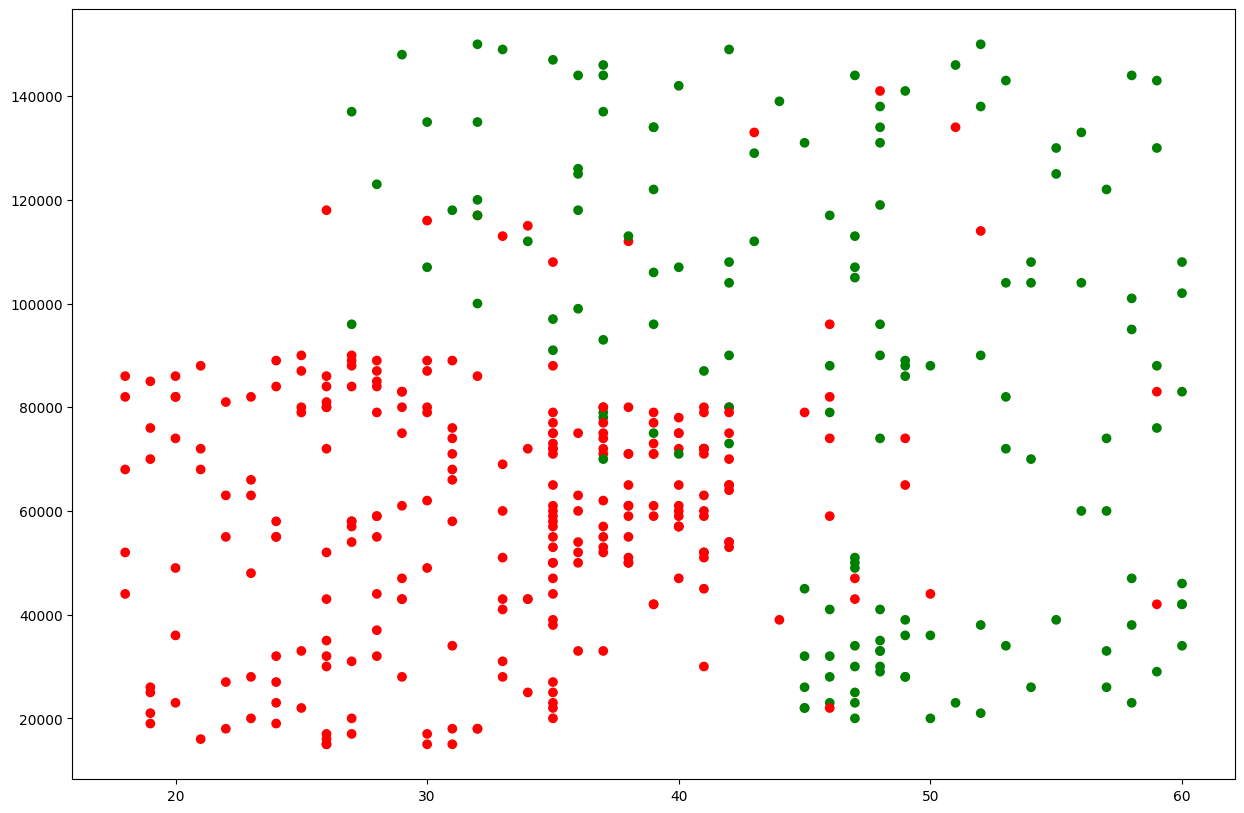

In [ ]:
fig,ax=plt.subplots()
colors= {0:'red',1:'green'}
ax.scatter(dados['Age'],dados['EstimatedSalary'],
           c= dados['Purchased'].map(colors))
plt.show()


In [ ]:
dados_atributos= dados[['Age','EstimatedSalary']]
dados_classes= dados['Purchased']

In [ ]:
scaler= StandardScaler() # Enxugada dos atributos
dados_atributos= scaler.fit_transform(dados_atributos)

In [ ]:
agrupamento= fz.cmeans(data= dados_atributos.T, c=2,
                       m=2,error=0.005,maxiter=1000)

In [ ]:
grau_p= agrupamento[1] #

In [ ]:
grau_p.shape # Dividiu tudo em dois Agrupamentos

(2, 400)

In [ ]:
grau_p[0][0]

0.7936497967962504

In [ ]:
grau_p[1][0]

0.2063502032037497

In [ ]:
clusters=grau_p.argmax(axis=0)
clusters

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,

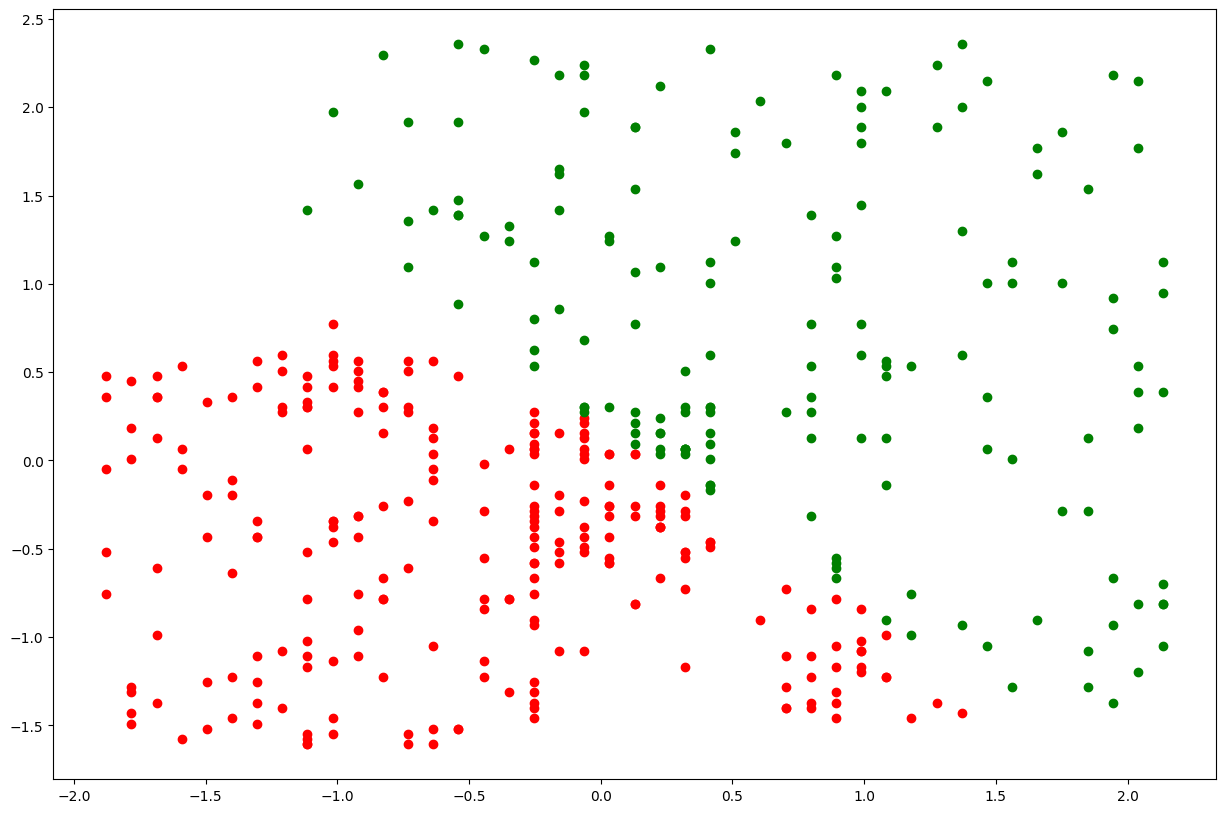

In [ ]:
plt.scatter(dados_atributos[clusters==0,0],
            dados_atributos[clusters==0,1],c='red')
plt.scatter(dados_atributos[clusters==1,0],
            dados_atributos[clusters==1,1],c='green')
plt.show()

In [ ]:
ac= accuracy_score(dados_classes.array,clusters)
print=(f'Acurácia de classificação {round(ac,3)*100}%')

In [ ]:
fuzzy=np.amax(grau_p,axis=0)

In [ ]:
cores = ['red','green','orange']
corte = 0.6

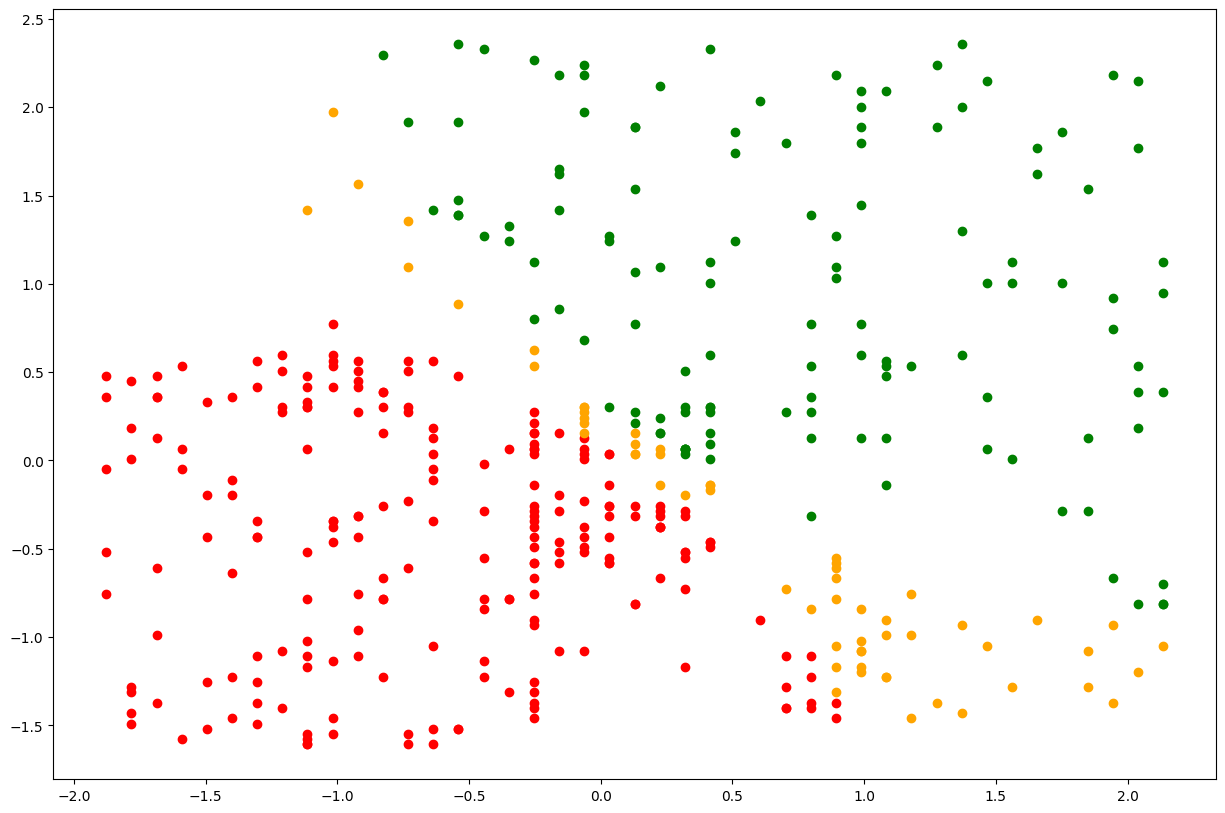

In [ ]:
for i,classe in enumerate(clusters):
  if fuzzy[i]>=corte:
    plt.scatter(dados_atributos[i,0],
                dados_atributos[i,1],color=cores[classe])
  else:
    plt.scatter(dados_atributos[i,0],
                 dados_atributos[i,1],color=cores[len(cores)-1])
plt.show()